In [ ]:
# 250325

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.dates import date2num, DateFormatter, MonthLocator
import datetime
import os

plot_path = ".plot"
os.makedirs(plot_path, exist_ok=True)
model_dict = pd.read_csv(r"../0_data/model_info.csv", index_col=0)

In [ ]:
data = pd.read_csv(r'../2_analyze/.out/mean_merged.csv', index_col=0)
new_columns = model_dict.loc[:, ~model_dict.columns.isin(data.columns)]
merged_df = pd.concat([data, new_columns], axis=1)
merged_df.set_index('Abb name', inplace=True)
merged_df=merged_df.sort_values(by='eng-rate', ascending=False)

df=merged_df[(merged_df['Scoring'] == 1)]

df_1 = df[(df['Class'] == 'L')]
df_2 = df[(df['Class'] == 'M')]
df_3 = df[(df['Class'] == 'S')]
df_4 = df[(df['Class'] == 'P')]

color_dict = {'P': 'tab:blue', 'S': 'gold', 'M': 'tab:orange', 'L': 'tab:red'}

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


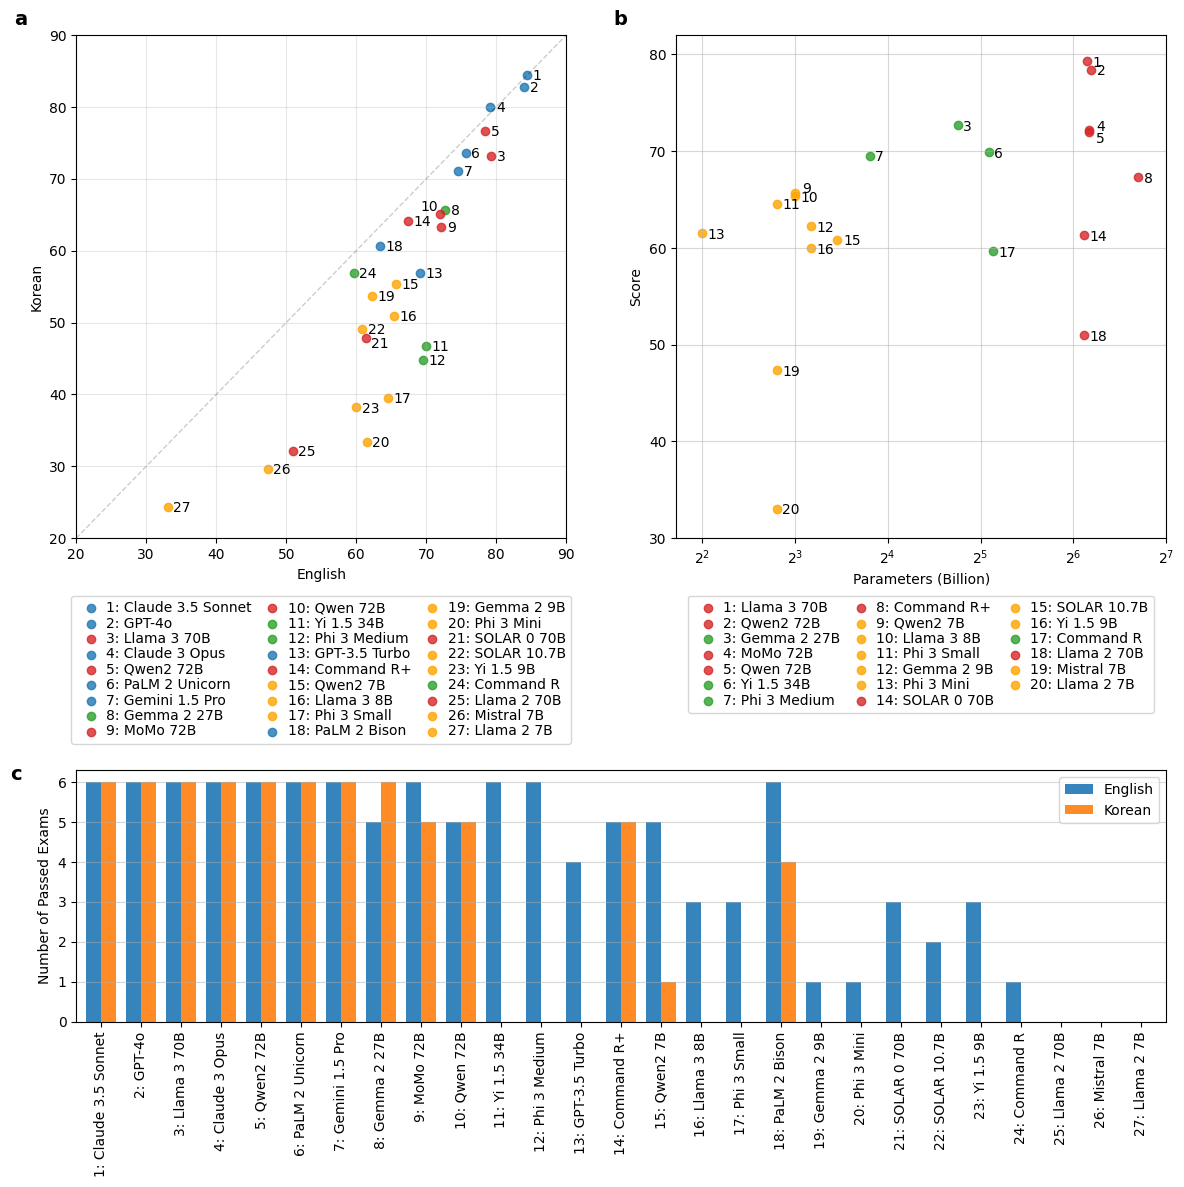

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
color_dict = {'P': 'tab:blue', 'S': 'orange', 'M': 'tab:green', 'L': 'tab:red'}

gs = fig.add_gridspec(2, 2, height_ratios=[1, 0.5], width_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# ----- 1st plot (eng-rate vs kor-rate) -----
for i, (name, row) in enumerate(df.iterrows()):
    color = color_dict.get(row['Class'], 'black')
    ax1.scatter(row['eng-rate'], row['kor-rate'], alpha=0.8, color=color, label=f"{i+1}: {name}")

    if i+1 == 10:
        ax1.annotate(i+1, (row['eng-rate'], row['kor-rate']), xytext=(-14, 2), textcoords='offset points', ha='left')
    elif i+1 == 21:
        ax1.annotate(i+1, (row['eng-rate'], row['kor-rate']), xytext=(4, -7), textcoords='offset points', ha='left')
    else:
        ax1.annotate(i+1, (row['eng-rate'], row['kor-rate']), xytext=(4, -3.5), textcoords='offset points', ha='left')

ax1.set_xlabel('English')
ax1.set_ylabel('Korean')
ax1.set_xlim(20, 90)
ax1.set_ylim(20, 90)
ax1.plot([20, 100], [20, 100], color='black', linestyle='--', alpha=0.2, linewidth=1)
ax1.grid(True, alpha=0.3)
ax1.text(-0.1, 1.05, 'a', transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax1.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.1), labelspacing=0.1, handletextpad=0.1, columnspacing=0.5)

# ----- 2nd plot (Params vs eng-rate) -----
df_local = merged_df[(merged_df['Scoring'] == 1) & (merged_df['Type'] == 'Local')]

for i, (name, row) in enumerate(df_local.iterrows()):
    color = color_dict.get(row['Class'], 'black')
    ax2.scatter(row['Params'], row['eng-rate'], alpha=0.8, color=color, label=f"{i+1}: {name}")

    if i+1 == 4:
        ax2.annotate(i+1, (row['Params'], row['eng-rate']), xytext=(5, 0), textcoords='offset points', ha='left')
    elif i+1 == 9:
        ax2.annotate(i+1, (row['Params'], row['eng-rate']), xytext=(5, 0), textcoords='offset points', ha='left')
    elif i+1 == 5:
        ax2.annotate(i+1, (row['Params'], row['eng-rate']), xytext=(5, -8), textcoords='offset points', ha='left')
    else:
        ax2.annotate(i+1, (row['Params'], row['eng-rate']), xytext=(4, -4), textcoords='offset points', ha='left')

ax2.set_xlabel('Parameters (Billion)')
ax2.set_ylabel('Score')
ax2.set_xscale('log', base=2)
ax2.set_xlim(3.3, 128)
ax2.set_ylim(30, 82)
ax2.grid(True, axis='x', linestyle='-', linewidth=0.8, alpha=0.5)
ax2.grid(True, axis='y', linestyle='-', linewidth=0.8, alpha=0.5)
x_range = np.log2(128) - np.log2(3.3)
y_range = 82 - 30
ax2.text(-0.1, 1.05, 'b', transform=ax2.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax2.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.1), labelspacing=0.1, handletextpad=0.1, columnspacing=0.5)

# ----- 3rd plot (Grouped Bar Chart) -----
df_pass = merged_df[(merged_df['Scoring'] == 1)]
df_ = pd.DataFrame({'English': df_pass['eng-pass'], 'Korean': df_pass['kor-pass']})
df_.index = [f"{i+1}: {name}" for i, name in enumerate(df_pass.index)]

df_[['English', 'Korean']].plot(kind='bar', ax=ax3, color=['tab:blue', 'tab:orange'], width=0.75, alpha=0.9)
ax3.set_ylabel('Number of Passed Exams')
ax3.set_xticklabels(df_.index, rotation=90)
ax3.legend(loc='upper right', ncol=1)
ax3.text(-0.05, 1.02, 'c', transform=ax3.transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax3.grid(True, axis='y', linestyle='-', linewidth=0.8, alpha=0.5)
# ax3.set_aspect('auto')

plt.tight_layout()
plt.savefig(f"{plot_path}/1-combined.pdf", format='pdf', bbox_inches='tight')
plt.show()